# **Modelling and Evaluation**

## Objectives

* Answer business requirement 1: Predict house prices using machine learning.
* Answer business requirement 2: Evaluate model performance using key metrics.
* Answer business requirement 3: Save and visualize results for future use.

## Inputs

* `house_prices_records.csv`: Dataset containing house price information.
* `inherited_houses.csv`: Dataset containing inherited house details.

## Outputs
* Model evaluation metrics (e.g., RMSE, R^2).
* Feature importance plot.
* Prediction visualization.
* Trained model file saved as a `.pkl` file.

# Import Required Libraries

In [3]:
# Import essential libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import json

# Set visualization style
sns.set_style("whitegrid")


ModuleNotFoundError: No module named 'numpy.strings'

# Change working directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-analysis/jupyter_notebooks'

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [6]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-analysis'

# Load and Prepare Data

In [11]:
# Define the path for the data folder
data_path = "data/house-price-20211124T154130Z-001/house-price"

# Load the house prices dataset
house_prices_file = os.path.join(data_path, "house_prices_records.csv")
house_prices_df = pd.read_csv(house_prices_file)
print("Loaded House Prices Dataset:")
print(house_prices_df.head())

# Load the inherited houses dataset
inherited_houses_file = os.path.join(data_path, "inherited_houses.csv")
inherited_houses_df = pd.read_csv(inherited_houses_file)
print("\nLoaded Inherited Houses Dataset:")
print(inherited_houses_df.head())

ModuleNotFoundError: No module named 'numpy.rec'

# Data Preprocessing

In [10]:
# Check for missing values
print("\nMissing values in House Prices dataset:")
print(house_prices_df.isnull().sum())

print("\nMissing values in Inherited Houses dataset:")
print(inherited_houses_df.isnull().sum())

# Fill missing values (if any) for numerical columns only
numerical_columns_house_prices = house_prices_df.select_dtypes(include=['number']).columns
numerical_columns_inherited_houses = inherited_houses_df.select_dtypes(include=['number']).columns

house_prices_df[numerical_columns_house_prices] = house_prices_df[numerical_columns_house_prices].fillna(
    house_prices_df[numerical_columns_house_prices].mean()
)

inherited_houses_df[numerical_columns_inherited_houses] = inherited_houses_df[numerical_columns_inherited_houses].fillna(
    inherited_houses_df[numerical_columns_inherited_houses].mean()
)

print("\nAfter filling missing values in House Prices dataset:")
print(house_prices_df.isnull().sum())

print("\nAfter filling missing values in Inherited Houses dataset:")
print(inherited_houses_df.isnull().sum())



Missing values in House Prices dataset:


NameError: name 'house_prices_df' is not defined

# Feature Selection

In [8]:
# Select features for the model (adjust as needed)
selected_features = ["GrLivArea", "GarageArea", "TotalBsmtSF", "OverallQual"]
target_column = "SalePrice"

# Prepare X and y for house prices dataset
X = house_prices_df[selected_features]
y = house_prices_df[target_column]

print("\nSelected Features:")
print(X.head())



Selected Features:
   GrLivArea  GarageArea  TotalBsmtSF  OverallQual
0       1710         548          856            7
1       1262         460         1262            6
2       1786         608          920            7
3       1717         642          756            7
4       2198         836         1145            8


# Split Data into Training and Test Sets

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Test Set Sizes:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")



Training and Test Set Sizes:
Training set: (1168, 4)
Test set: (292, 4)


# Train the Model

In [11]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Complete.")



Model Training Complete.


# Evaluate the Model

In [12]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Perform Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Save Metrics for Streamlit
evaluation_results = {
    "Train R²": round(model.score(X_train, y_train), 3),
    "Test R²": round(r2, 3),
    "Mean Absolute Error (MAE)": round(mae, 3),
    "Root Mean Squared Error (RMSE)": round(rmse, 3),
    "Cross-Validation Mean R²": round(cv_mean, 3),
    "Cross-Validation Std Dev": round(cv_std, 3)
}

with open("outputs/model_metrics.json", "w") as f:
    json.dump(evaluation_results, f)

print("✅ Model Evaluation Saved:", evaluation_results)

✅ Model Evaluation Saved: {'Train R²': 0.745, 'Test R²': 0.791, 'Mean Absolute Error (MAE)': 25055.295, 'Root Mean Squared Error (RMSE)': 40046.559, 'Cross-Validation Mean R²': 0.735, 'Cross-Validation Std Dev': 0.072}


# Plotting Section

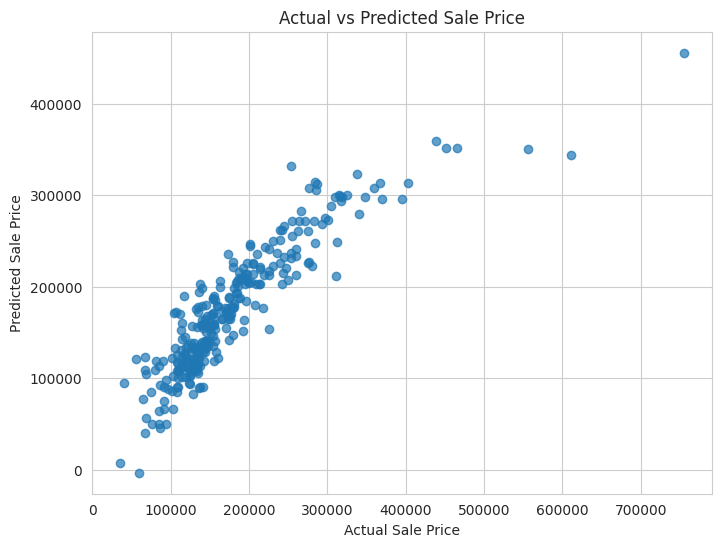

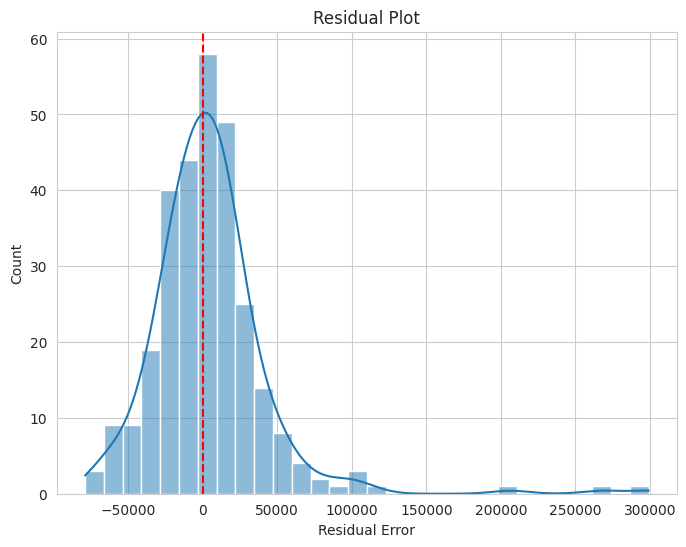

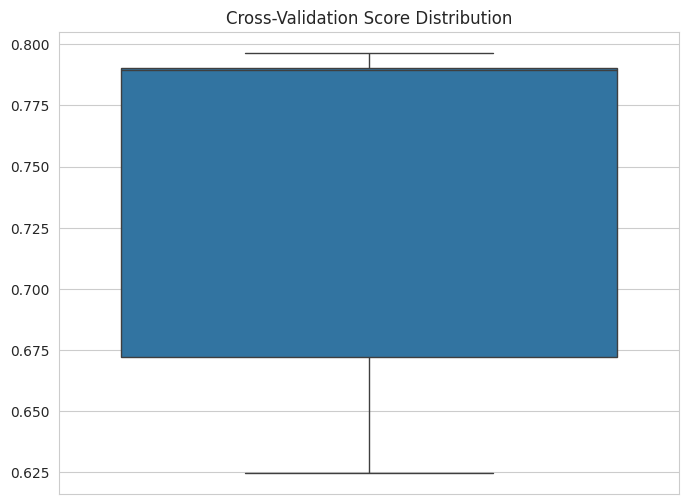

In [13]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.savefig("outputs/model_actual_vs_predicted.png", bbox_inches='tight')
plt.show()

# Residual Plot (Errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle="--")
plt.xlabel("Residual Error")
plt.title("Residual Plot")
plt.savefig("outputs/residual_plot.png", bbox_inches='tight')
plt.show()

# Cross-Validation Score Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(cv_scores)
plt.title("Cross-Validation Score Distribution")
plt.savefig("outputs/cv_score_distribution.png", bbox_inches='tight')
plt.show()

# Save the Model

In [14]:
# Save the trained model for future use
model_file = "outputs/trained_model.pkl"
joblib.dump((model, selected_features), model_file)
print(f"Model and Selected Features saved at {model_file}")


Model and Selected Features saved at outputs/trained_model.pkl


# Predict on New Data

In [15]:
# Load Model and Features
model, selected_features = joblib.load(model_file)

# Predict on the inherited houses dataset
X_inherited = inherited_houses_df[selected_features]

# Predict Prices
predicted_prices = model.predict(X_inherited)
inherited_houses_df["PredictedPrice"] = predicted_prices

print("\nInherited Houses with Predicted Prices:")
print(inherited_houses_df.head())

# Save the results
results_file = "outputs/inherited_houses_with_predictions.csv"
inherited_houses_df.to_csv(results_file, index=False)
print(f"Predictions saved at {results_file}")



Inherited Houses with Predicted Prices:
   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       896         0             2           No       468.0          Rec   
1      1329         0             3           No       923.0          ALQ   
2       928       701             3           No       791.0          GLQ   
3       926       678             3           No       602.0          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0      270.0              0       730.0          Unf  ...         80.0   
1      406.0              0       312.0          Unf  ...         81.0   
2      137.0              0       482.0          Fin  ...         74.0   
3      324.0              0       470.0          Fin  ...         78.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0         0.0           0            6            5        882.0         140   
1       108.0          36            6    